In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from Handler import *
import os

In [2]:
# path_data = "/Volumes/elmichelangelo_external_ssd_1/Data/gaNdalF_paper_catalogs"
path_data = "/Users/P.Gebhardt/Development/PhD/data"
path_data_master_cat = "/Volumes/elmichelangelo_external_ssd_1/Data/gaNdalF"
filename_flw_balrog = "2024-10-02_10-37_balrog_flw_Test_sample.pkl"
filename_flw_gandalf = "2024-10-02_10-37_gandalf_flw_Test_sample.pkl"
filename_master_cat = "Y3_mastercat_02_05_21.h5"
path_save_plots = "../../Output/gaNdalF_paper"

In [3]:
df_balrog_flw = pd.read_pickle(f"{path_data}/{filename_flw_balrog}")
df_gandalf_flw = pd.read_pickle(f"{path_data}/{filename_flw_gandalf}")

In [4]:
columns = [
    "unsheared/mag_r",
    "unsheared/mag_i",
    "unsheared/mag_z",
    "Color unsheared MAG r-i",
    "Color unsheared MAG i-z",
    "unsheared/snr",
    "unsheared/size_ratio",
    "unsheared/weight",
    "unsheared/T"
]

In [5]:
df_balrog_flw = df_balrog_flw[columns]
df_gandalf_flw = df_gandalf_flw[columns]

In [6]:
def cut_snr(data_frame):
    cuts = (
            (10 < data_frame["unsheared/snr"]) &
            (data_frame["unsheared/snr"] < 1000) # &
            # (0.5 < data_frame["unsheared/size_ratio"]) &
            # (data_frame["unsheared/T"] < 10)
    )
    data_frame = data_frame[cuts]
    return data_frame

In [7]:
def replace_nan(data_frame, cols, default_values):
    """
    Replace all NaN values in a specified column of a DataFrame with a default value.

    Parameters:
    df (pandas.DataFrame): The DataFrame to modify.
    column_name (lst): The name of the column to process.
    default_value (lst): The value to replace NaNs with.

    Returns:
    pandas.DataFrame: The DataFrame with NaNs replaced in the specified column.
    """
    for idx, col in enumerate(cols):
        data_frame[col] = data_frame[col].fillna(default_values[idx])
    return data_frame

In [8]:
def max_default(data_frame, cols, max_lim):
    for idx, col in enumerate(cols):
        arr_flw = data_frame[col].to_numpy()
        for i, val in enumerate(arr_flw):
            if val > max_lim[idx]:
                arr_flw[i] = max_lim[idx]
        data_frame[col] = arr_flw
    return data_frame

In [9]:
def min_default(data_frame, cols, min_lim):
    for idx, col in enumerate(cols):
        arr_flw = data_frame[col].to_numpy()
        for i, val in enumerate(arr_flw):
            if val < min_lim[idx]:
                arr_flw[i] = min_lim[idx]
        data_frame[col] = arr_flw
    return data_frame

In [10]:
lst_col_nan = [
    "unsheared/mag_r",
    "unsheared/mag_i",
    "unsheared/mag_z",
    "unsheared/snr",
    "unsheared/size_ratio",
    "unsheared/weight",
    "unsheared/T",
]

lst_nan = [
    df_balrog_flw["unsheared/mag_r"].max(), 
    df_balrog_flw["unsheared/mag_i"].max(),
    df_balrog_flw["unsheared/mag_z"].max(),
    df_balrog_flw["unsheared/snr"].max(),
    df_balrog_flw["unsheared/size_ratio"].max(),
    df_balrog_flw["unsheared/weight"].max(),
    df_balrog_flw["unsheared/T"].max(),
]
lst_col_max = [
    "unsheared/mag_r",
    "unsheared/mag_i",
    "unsheared/mag_z",
    # "unsheared/weight",
    # "unsheared/T"
]

lst_max = [
    df_balrog_flw["unsheared/mag_r"].max(), 
    df_balrog_flw["unsheared/mag_i"].max(),
    df_balrog_flw["unsheared/mag_z"].max(),
    # df_balrog_flw["unsheared/weight"].max(),
    # df_balrog_flw["unsheared/T"].max()
]
lst_col_min = [
    "unsheared/snr"
]

lst_min = [
    df_balrog_flw["unsheared/snr"].min()
]

In [11]:
for col in ["unsheared/snr", "unsheared/size_ratio", "unsheared/weight", "unsheared/T"]:
    print("Balrog", col,  df_balrog_flw[col].min(), df_balrog_flw[col].max())
    print("gandalf", col,  df_gandalf_flw[col].min(), df_gandalf_flw[col].max(), len(df_gandalf_flw[df_gandalf_flw[col] < df_balrog_flw[col].min()]), len(df_gandalf_flw[df_gandalf_flw[col] > df_balrog_flw[col].max()]))

Balrog unsheared/snr 0.2922319918893921 2156553.400698355
gandalf unsheared/snr -1.3403619464477559 892543939.6454452 182 41
Balrog unsheared/size_ratio -0.863650170709954 4346136.564595506
gandalf unsheared/size_ratio -1.056310170403342 5958409.006839054 4 1
Balrog unsheared/weight 10.300535620007455 77.58102207323857
gandalf unsheared/weight 1.3665886212677467 5841394.611151484 987493 26272
Balrog unsheared/T -0.35429057220318616 1430981.5103585045
gandalf unsheared/T -1.6248105766957441 1483.259239868674 1211 0


In [12]:
df_gandalf_flw = replace_nan(df_gandalf_flw, lst_col_nan, lst_nan)
df_gandalf_flw = max_default(df_gandalf_flw, lst_col_max, lst_max)
# df_gandalf_flw = min_default(df_gandalf_flw, lst_col_min, lst_min)

In [13]:
df_gandalf_flw["Color unsheared MAG r-i"] = df_gandalf_flw["unsheared/mag_r"] - df_gandalf_flw["unsheared/mag_i"]
df_gandalf_flw["Color unsheared MAG i-z"] = df_gandalf_flw["unsheared/mag_i"] - df_gandalf_flw["unsheared/mag_z"]

In [14]:
df_gandalf_flw_cut = df_gandalf_flw.copy()
df_gandalf_flw_cut = unsheared_mag_cut(df_gandalf_flw_cut)

Apply unsheared mag cuts
Length of catalog after applying unsheared mag cuts: 6051712


In [15]:
df_balrog_flw_cut = df_balrog_flw.copy()
df_balrog_flw_cut = unsheared_mag_cut(df_balrog_flw_cut)

Apply unsheared mag cuts
Length of catalog after applying unsheared mag cuts: 6075070


In [16]:
print(f"Length of Balrog objects: {len(df_balrog_flw)}")
print(f"Length of gaNdalF objects: {len(df_gandalf_flw)}")
print(f"Length of Balrog objects after mag cut: {len(df_balrog_flw_cut)}")
print(f"Length of gaNdalF objects after mag cut: {len(df_gandalf_flw_cut)}")

Length of Balrog objects: 8616255
Length of gaNdalF objects: 8614806
Length of Balrog objects after mag cut: 6075070
Length of gaNdalF objects after mag cut: 6051712


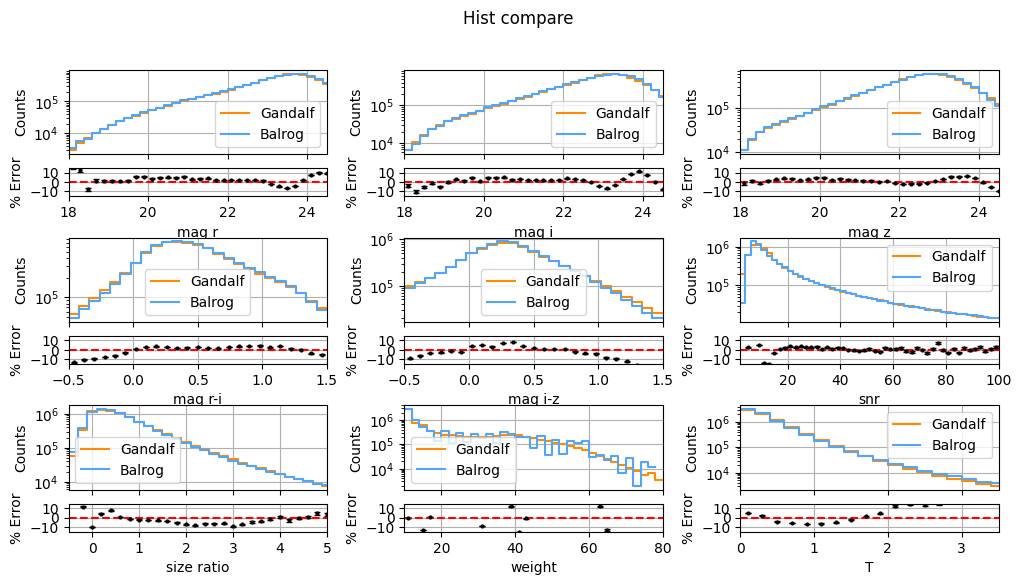

<Figure size 640x480 with 0 Axes>

In [24]:
plot_balrog_histogram_with_error(
    df_gandalf=df_gandalf_flw,
    df_balrog=df_balrog_flw,
    columns=[
        "unsheared/mag_r",
        "unsheared/mag_i",
        "unsheared/mag_z",
        "Color unsheared MAG r-i",
        "Color unsheared MAG i-z",
        "unsheared/snr",
        "unsheared/size_ratio",
        "unsheared/weight",
        "unsheared/T"
    ],
    labels=[
        "mag r",
        "mag i",
        "mag z",
        "mag r-i",
        "mag i-z",
        "snr",
        "size ratio",
        "weight",
        "T"
    ],
    ranges=[
        [18, 24.5],  # mag r
        [18, 24.5],  # mag i
        [18, 24.5],  # mag z
        [-0.5, 1.5],  # mag r-i
        [-0.5, 1.5],  # mag i-z
        [2, 100],  # snr
        [-0.5, 5],  # size ratio
        [10, 80],  # weight
        [0, 3.5]  # T
    ],
    binwidths=[
        None,  # mag r
        None,  # mag i
        None,  # mag z
        0.08,  # mag r-i
        0.08,  # mag i-z
        2,  # snr
        0.2,  # size ratio
        2,  # weight
        0.2  # T
    ],
    title="Hist compare",
    show_plot=True,
    save_plot=False,
    save_name=f"{path_save_plots}/balrog_hist_plot.png"
)

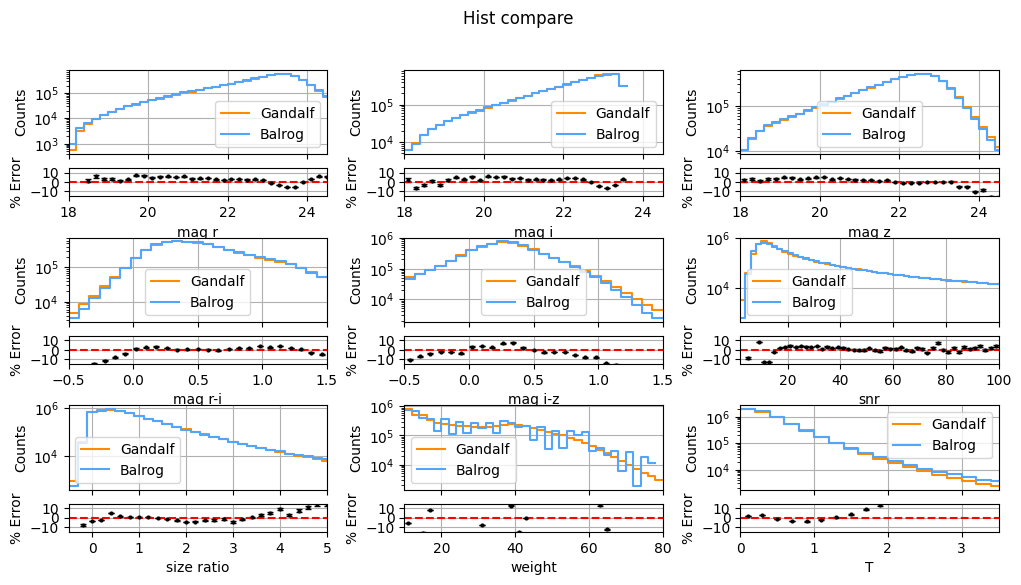

<Figure size 640x480 with 0 Axes>

In [25]:
plot_balrog_histogram_with_error(
    df_gandalf=df_gandalf_flw_cut,
    df_balrog=df_balrog_flw_cut,
    columns=[
        "unsheared/mag_r",
        "unsheared/mag_i",
        "unsheared/mag_z",
        "Color unsheared MAG r-i",
        "Color unsheared MAG i-z",
        "unsheared/snr",
        "unsheared/size_ratio",
        "unsheared/weight",
        "unsheared/T"
    ],
    labels=[
        "mag r",
        "mag i",
        "mag z",
        "mag r-i",
        "mag i-z",
        "snr",
        "size ratio",
        "weight",
        "T"
    ],
    ranges=[
        [18, 24.5],  # mag r
        [18, 24.5],  # mag i
        [18, 24.5],  # mag z
        [-0.5, 1.5],  # mag r-i
        [-0.5, 1.5],  # mag i-z
        [2, 100],  # snr
        [-0.5, 5],  # size ratio
        [10, 80],  # weight
        [0, 3.5]  # T
    ],
    binwidths=[
        None,  # mag r
        None,  # mag i
        None,  # mag z
        0.08,  # mag r-i
        0.08,  # mag i-z
        2,  # snr
        0.2,  # size ratio
        2,  # weight
        0.2  # T
    ],
    title="Hist compare",
    show_plot=True,
    save_plot=False,
    save_name=f"{path_save_plots}/balrog_hist_plot.png"
)

In [24]:
df_gandalf_flw_sub_cut = df_gandalf_flw_cut.sample(n=int(1E6))
df_balrog_flw_sub_cut = df_balrog_flw_cut.sample(n=int(1E6))

df_gandalf_flw_sub = df_gandalf_flw.sample(n=int(1E6))
df_balrog_flw_sub = df_balrog_flw.sample(n=int(1E6))

Plot histogram for col unsheared/mag_r. Δmean=1.60e+03
Δmedian=-1.97e-01
Plot gandalf kde for col unsheared/snr and unsheared/mag_r
Plot histogram for col unsheared/snr. Δmean=1.47e-02
Δmedian=1.37e-02


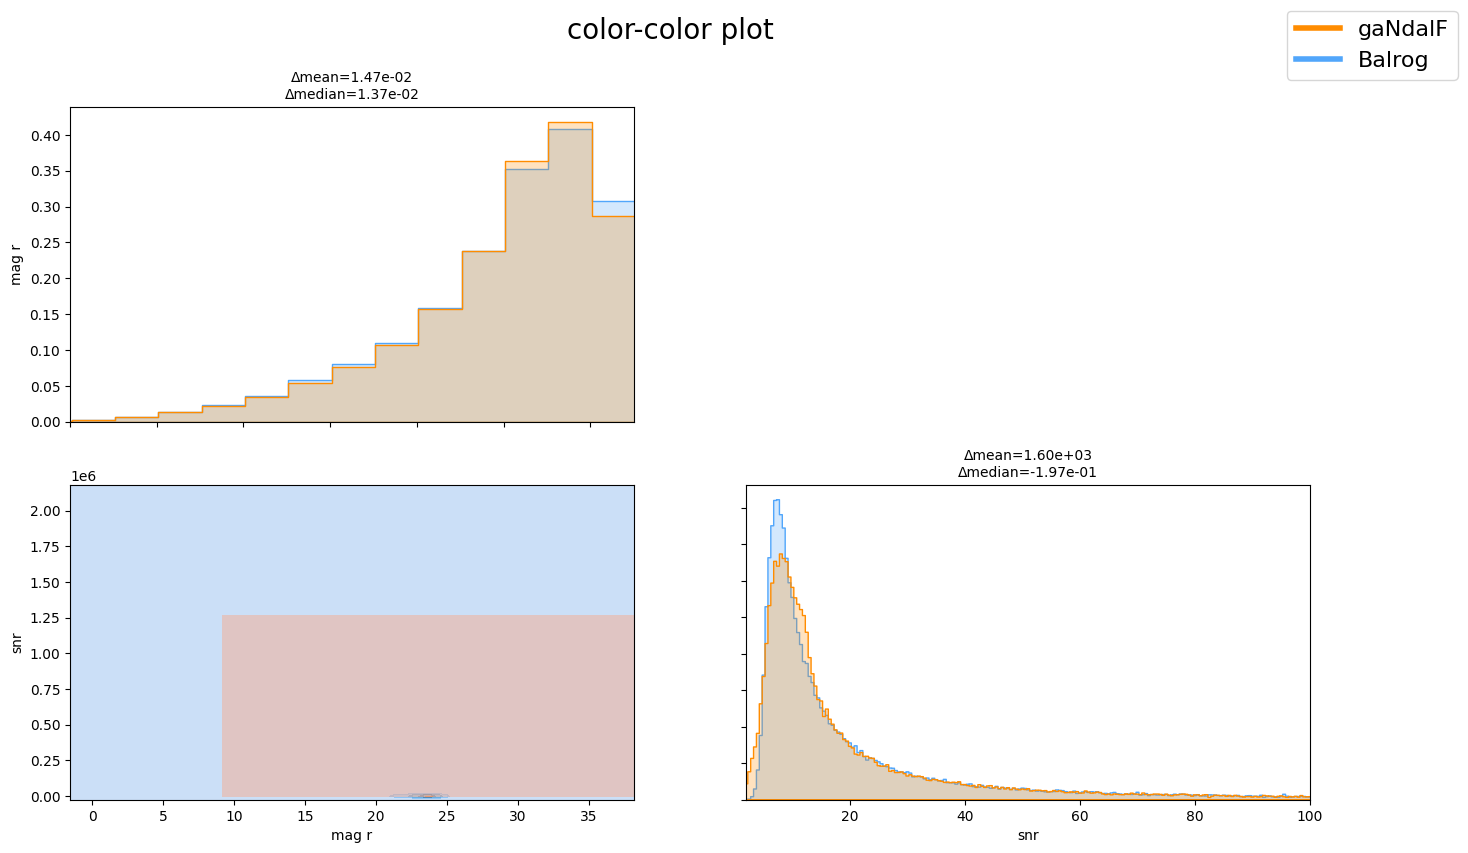

In [23]:
plot_compare_seaborn(
    data_frame_generated=df_gandalf_flw_sub,
    data_frame_true=df_balrog_flw_sub,
    dict_delta=None,
    epoch=None,
    title=f"color-color plot",
    columns=[
        # "Color unsheared MAG r-i",
        # "Color unsheared MAG i-z",
        "unsheared/mag_r",
        # "unsheared/mag_i",
        # "unsheared/mag_z",
        "unsheared/snr",
        # "unsheared/size_ratio",
        # "unsheared/weight",
        # "unsheared/T"
    ],
    labels=[
        # "r-i",
        # "i-z",
        "mag r",
        # "mag i",
        # "mag z",
        "snr",
        # "size ratio",
        # "weight",
        # "T"
    ],
    show_plot=True,
    save_plot=False,
    save_name=f"{path_save_plots}/color_color.png",
    ranges={
        # "Color unsheared MAG r-i": [-0.5, 1.5],
        # "Color unsheared MAG i-z": [-0.5, 1.5],
        "unsheared/mag_r": [18, 24.5],
        # "unsheared/mag_i": [18, 24.5],
        # "unsheared/mag_z": [18, 24.5],
        "unsheared/snr": [2, 100],
        # "unsheared/size_ratio": [-0.5, 5],
        # "unsheared/weight": [10, 80],
        # "unsheared/T": [0, 3.5]
    }
)

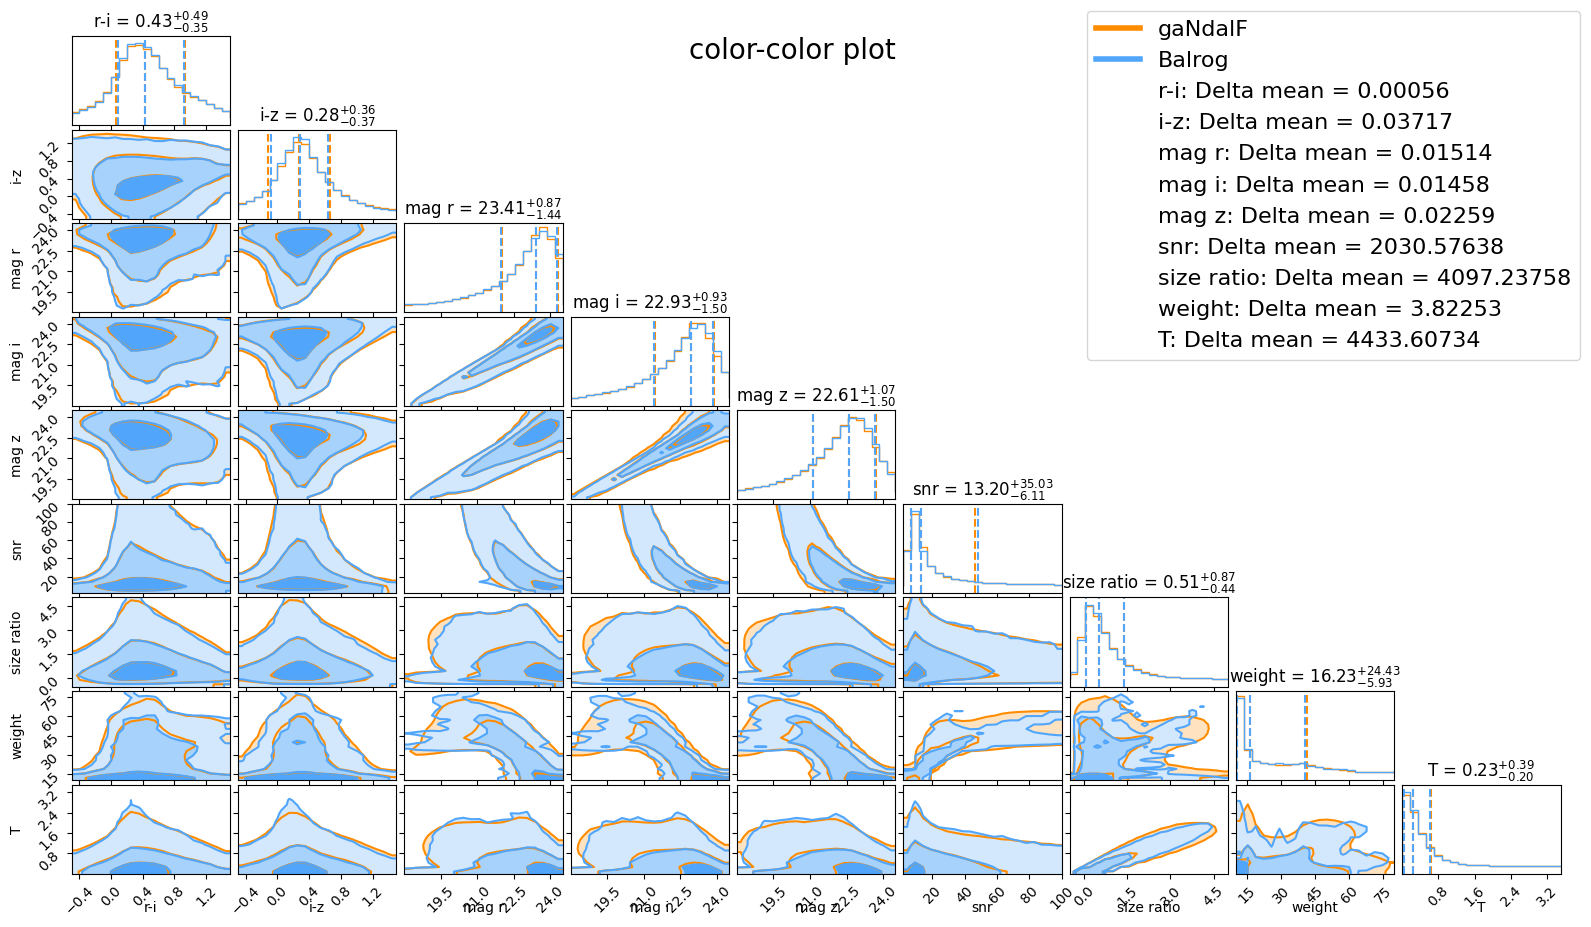

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
       

<Figure size 640x480 with 0 Axes>

In [20]:
plot_compare_corner(
    data_frame_generated=df_gandalf_flw,
    data_frame_true=df_balrog_flw,
    dict_delta=None,
    epoch=None,
    title=f"color-color plot",
    columns=[
        "Color unsheared MAG r-i",
        "Color unsheared MAG i-z",
        "unsheared/mag_r",
        "unsheared/mag_i",
        "unsheared/mag_z",
        "unsheared/snr",
        "unsheared/size_ratio",
        "unsheared/weight",
        "unsheared/T"
    ],
    labels=[
        "r-i",
        "i-z",
        "mag r",
        "mag i",
        "mag z",
        "snr",
        "size ratio",
        "weight",
        "T"
    ],
    show_plot=True,
    save_plot=False,
    save_name=f"{path_save_plots}/color_color.png",
    ranges=[
        [-0.5, 1.5],
        [-0.5, 1.5],
        [18, 24.5],
        [18, 24.5],
        [18, 24.5],
        [2, 100],
        [-0.5, 5],
        [10, 80],
        [0, 3.5]
    ]
)

Plot histogram for col Color unsheared MAG r-i. Δmean=-6.01e-04
Δmedian=-5.31e-04
Plot gandalf kde for col Color unsheared MAG i-z and Color unsheared MAG r-i
Plot histogram for col Color unsheared MAG i-z. Δmean=1.63e-03
Δmedian=-2.74e-05


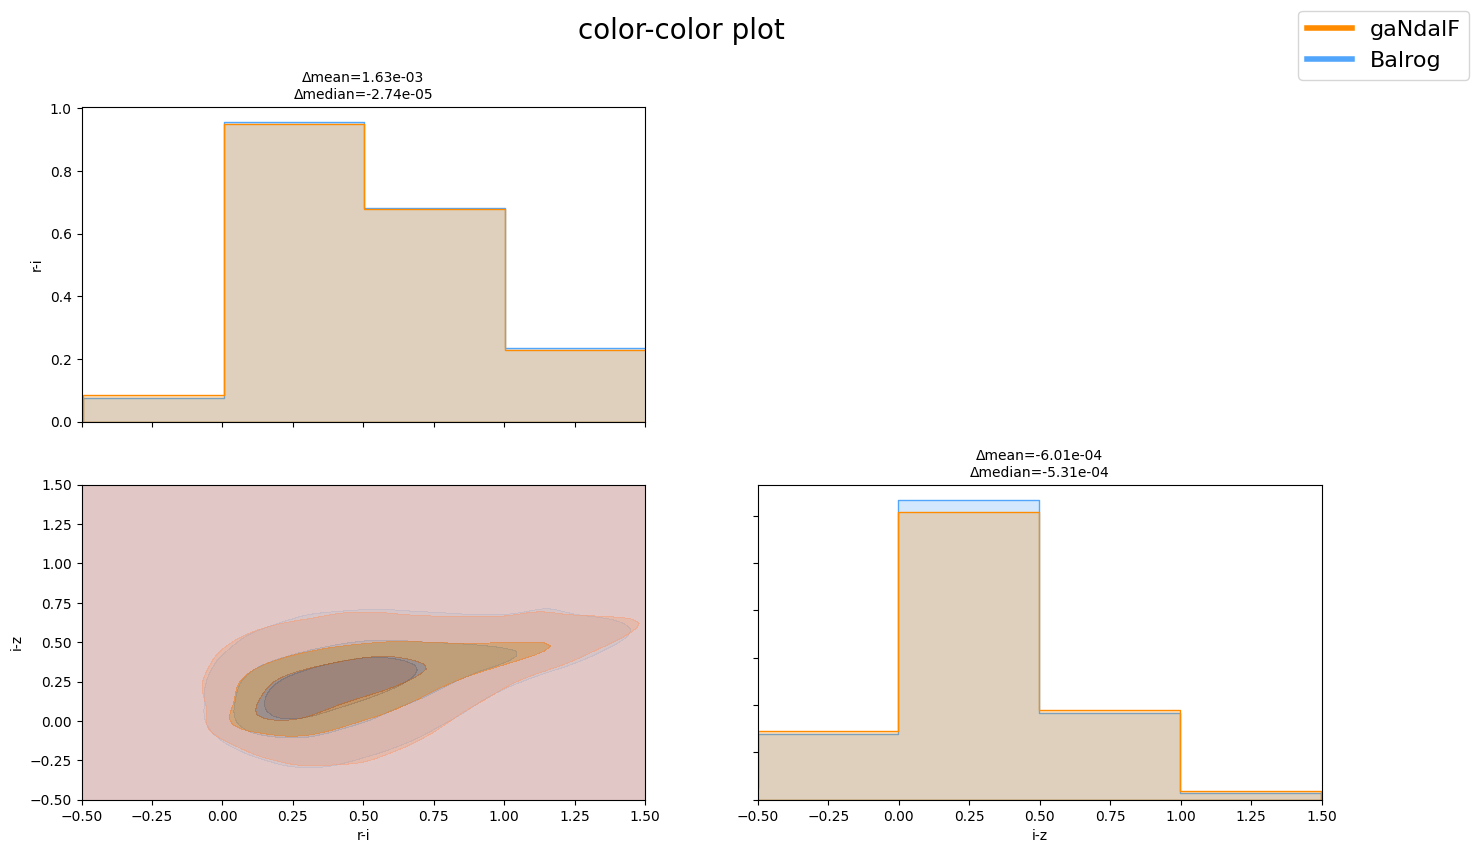

In [16]:
plot_compare_seaborn(
    data_frame_generated=df_gandalf_flw_sub_cut,
    data_frame_true=df_balrog_flw_sub_cut,
    dict_delta=None,
    epoch=None,
    title=f"color-color plot",
    columns=[
        "Color unsheared MAG r-i",
        "Color unsheared MAG i-z",
        # "unsheared/mag_r",
        # "unsheared/mag_i",
        # "unsheared/mag_z",
        # "unsheared/snr",
        # "unsheared/size_ratio",
        # "unsheared/weight",
        # "unsheared/T"
    ],
    labels=[
        "r-i",
        "i-z",
        # "mag r",
        # "mag i",
        # "mag z",
        # "snr",
        # "size ratio",
        # "weight",
        # "T"
    ],
    show_plot=True,
    save_plot=False,
    save_name=f"{path_save_plots}/color_color.png",
    ranges={
        "Color unsheared MAG r-i": [-0.5, 1.5],
        "Color unsheared MAG i-z": [-0.5, 1.5],
        # "unsheared/mag_r": [18, 24.5],
        # "unsheared/mag_i": [18, 24.5],
        # "unsheared/mag_z": [18, 24.5],
        # "unsheared/snr": [2, 100],
        # "unsheared/size_ratio": [-0.5, 5],
        # "unsheared/weight": [10, 80],
        # "unsheared/T": [0, 3.5]
    }
)